<a href="https://colab.research.google.com/github/Mercymerine/Projects_project/blob/main/cancer_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Getting the dataset

In [ ]:
#Getting datats from Kaggle
!pip install -q kaggle

In [ ]:
#Getting the dataset
!kaggle datasets download -d erdemtaha/cancer-data

Dataset URL: https://www.kaggle.com/datasets/erdemtaha/cancer-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 63.0MB/s]


In [ ]:
import zipfile
zipfile_path = '/content/cancer-data.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [ ]:
cancer = pd.read_csv('/content/Cancer_Data.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# DRop the unamned column
cancer.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
# DRop the unamned column
cancer.drop('id', axis=1, inplace=True)

# Data Analysis

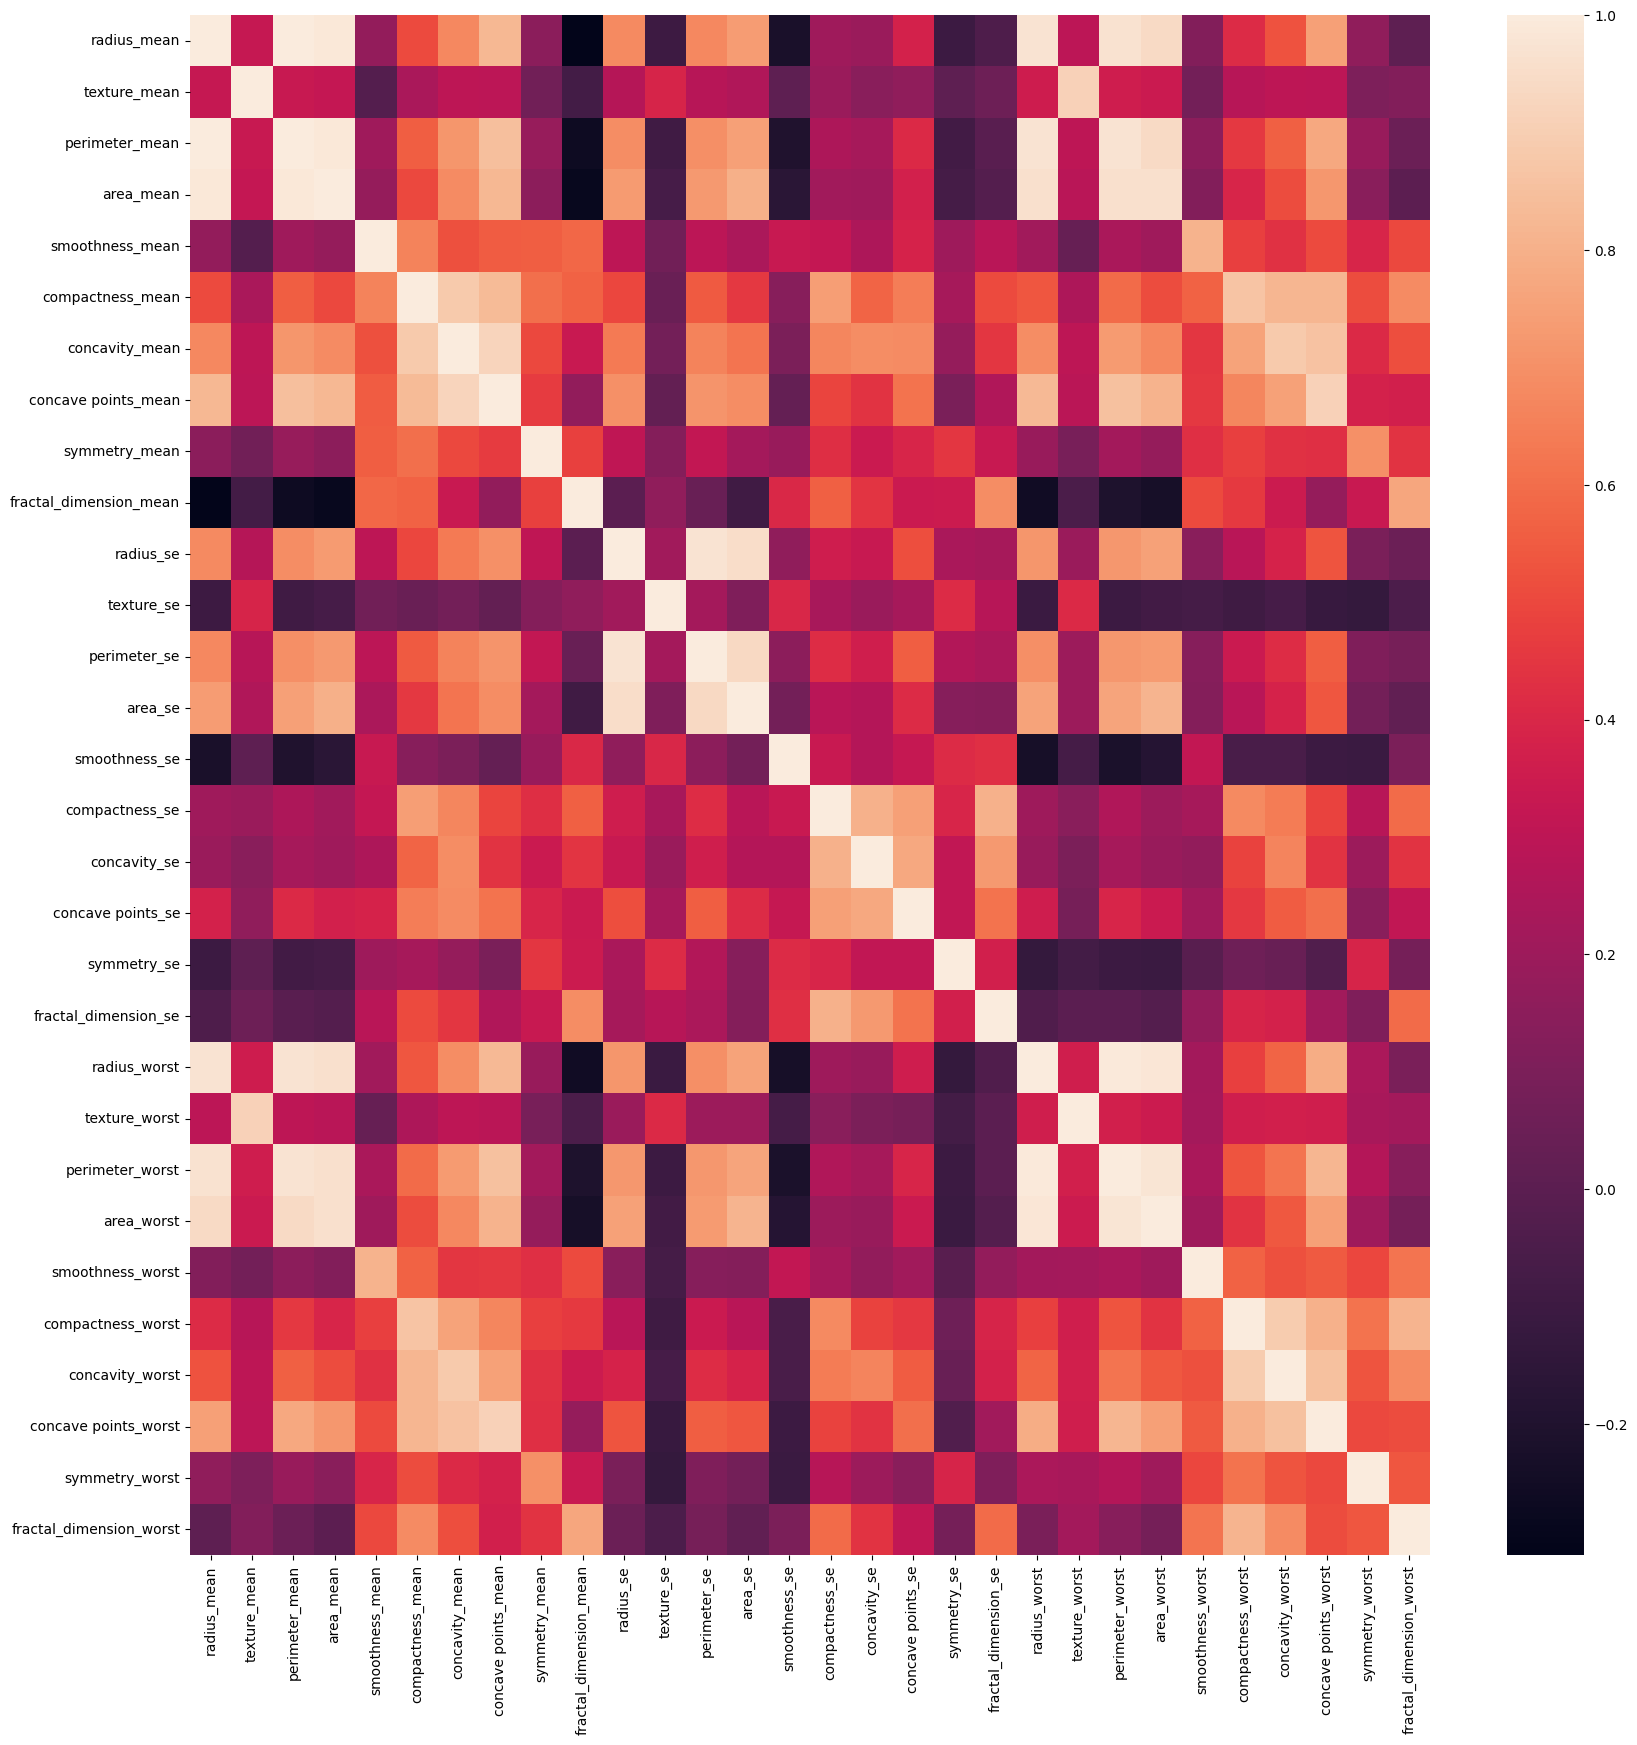

In [ ]:
# Select only columns with floats and integers
numerical_data = cancer.select_dtypes(include=['float', 'int'])

#Creating a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(numerical_data.corr())
plt.show()

# Splitting the datatset into x and y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = cancer.drop('diagnosis', axis=1)
y = cancer['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modelling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, weights='uniform'))
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)



[0.96703297 0.95604396 0.98901099 0.96703297 0.92307692]
0.9604395604395606


### Naive bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = make_pipeline(StandardScaler(), GaussianNB())
scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)



[0.9010989  0.96703297 0.93406593 0.93406593 0.93406593]
0.9340659340659341


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = make_pipeline(StandardScaler(), SVC(C=0.9, kernel='poly', degree=5, class_weight='balanced'))
scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)
